In [48]:
#optimizing the parameters of XCDM model(non-flat) by minimizing the chi-squared value

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#data of H_obs,z_obs,sigma_obs 

H_obs = np.array([69,69,68.6,83,75,75,72.9,77,88.8,83,83,95,77,87.1,92.8,89,80.9,97,104,92,105,125,90,117,154,168,160,177,140,202,186.5])
z_obs = np.array([0.07,0.09,0.12,0.17,0.179,0.199,0.2,0.27,0.28,0.352,0.3802,0.4,0.4004,0.4247,0.4497,0.47,0.4783,0.48,0.593,0.68,0.781,0.875,0.88,0.9,1.037,1.3,1.363,1.43,1.53,1.75,1.965])
sigma_obs = np.array([19.6,12,26.2,8,4,5,29.6,14,36.6,14,13.5,17,10.2,11.2,12.9,50,9,62,13,8,12,17,40,23,20,17,33.6,18,14,40,50.4])

In [50]:
def H_model ( z,parameters):
    omega_mo,omega_ko,wx,Ho = parameters
    H_model= Ho*np.sqrt(np.abs(omega_mo*(1+z)**3 + omega_ko*(1+z)**2 + (1-omega_mo-omega_ko)*((1+z)**(3*(1+wx)))))
    #print("H_model1:", H_model)
    return H_model

In [51]:
def chi_sq( parameters,H_obs,z_obs,sigma_obs):
    n = z_obs.shape[0]
    H_theo = np.zeros(n)
    omega_mo,omega_ko,wx,Ho = parameters
    chi_sq = 0
    for i in range(n):
        H_theo[i]= H_model( z_obs[i],parameters)
        #print("H_obs, H_theo:", H_obs[i], H_theo[i])
        chi_sq = chi_sq + ((H_obs[i] - H_theo[i])/(sigma_obs[i]))**2
    return chi_sq

In [33]:
initial = np.array([0.3,0.05,-1,70])
soln = minimize( chi_sq ,initial,args=( H_obs,z_obs,sigma_obs),bounds=[(0,1),(-0.7,0.7),(-2,0),(0,np.inf)])
print("Optimal Parameters:", soln.x)
print("Convergence:", soln.success)

Optimal Parameters: [ 0.19435116  0.29401158 -2.         73.70424882]
Convergence: True


In [130]:
initial = np.array([0.3,0.05,-1,70])
soln = minimize( chi_sq ,initial,args=( H_obs,z_obs,sigma_obs),bounds=[(0,1),(-0.7,0.7),(-2,0),(0,np.inf)])
print(soln)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 14.120423056313927
        x: [ 1.944e-01  2.940e-01 -2.000e+00  7.370e+01]
      nit: 38
      jac: [-1.510e-04 -6.128e-05  1.186e-01 -1.243e-06]
     nfev: 225
     njev: 45
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


In [37]:
def log_prior(parameters):
    omega_mo,omega_ko,wx,Ho = parameters
    if  0 <= omega_mo<= 1 and 0<= omega_ko <= 1 and -2<=wx<=0 and 50 <= Ho <= 85:
         return 0.0
    return -np.inf

In [39]:
def log_likelihood(parameters, H_obs, z_obs, sigma_obs):
    return -chi_sq(parameters, H_obs, z_obs, sigma_obs)/2

In [41]:
def log_probability(parameters,H_obs,z_obs ,sigma_obs):
    lp= log_prior(parameters)
    if not np.isfinite(lp):
        return -np.inf
    #print(lp)
    #print(lp + log_likelihood(parameters,H_obs,z_obs,sigma_obs))
    return lp + log_likelihood(parameters,H_obs,z_obs,sigma_obs)

In [97]:
import emcee
pos = soln.x +1e-4 * np.random.randn(200,4)
nwalkers ,ndim = pos.shape
sampler = emcee.EnsembleSampler(
    nwalkers,ndim,log_probability ,args =( H_obs,z_obs,sigma_obs))

In [98]:
pos,prob,state = sampler.run_mcmc(pos,1000,progress= True)

100%|██████████| 1000/1000 [00:17<00:00, 58.70it/s]


In [101]:
sampler.reset()

In [103]:
sampler.run_mcmc(pos,10000,progress=True)

100%|██████████| 10000/10000 [02:50<00:00, 58.56it/s]


State([[ 3.01489748e-01  1.90157398e-02 -1.43103833e+00  7.23395609e+01]
 [ 8.43239668e-02  8.61076655e-01 -1.20814164e+00  6.15413323e+01]
 [ 2.19573882e-01  4.37603982e-01 -1.96614249e+00  6.29868952e+01]
 [ 4.73041011e-02  8.04938466e-01 -4.91280391e-01  6.32720583e+01]
 [ 1.90238158e-01  5.68141163e-01 -1.76283207e+00  6.40236443e+01]
 [ 2.07785322e-01  1.95519547e-01 -1.28633200e+00  7.15405671e+01]
 [ 1.07978244e-01  4.69649819e-01 -1.82451471e+00  7.19128869e+01]
 [ 1.15589390e-01  4.74705149e-01 -6.64926276e-01  6.59696084e+01]
 [ 1.05603237e-01  6.38221317e-01 -4.45298114e-01  6.27168305e+01]
 [ 4.80479862e-02  7.18666150e-01 -1.46610716e+00  6.64920535e+01]
 [ 1.37969529e-01  8.40018192e-01 -2.23393347e-01  6.02465761e+01]
 [ 1.15766171e-01  5.54520990e-01 -1.22921228e+00  6.83228720e+01]
 [ 3.24993286e-01  3.31337884e-01 -1.79755500e+00  6.74922447e+01]
 [ 3.42919335e-02  4.55324606e-01 -5.63810211e-01  6.59431819e+01]
 [ 1.70426046e-01  3.01772950e-01 -1.45690625e+00  7.490

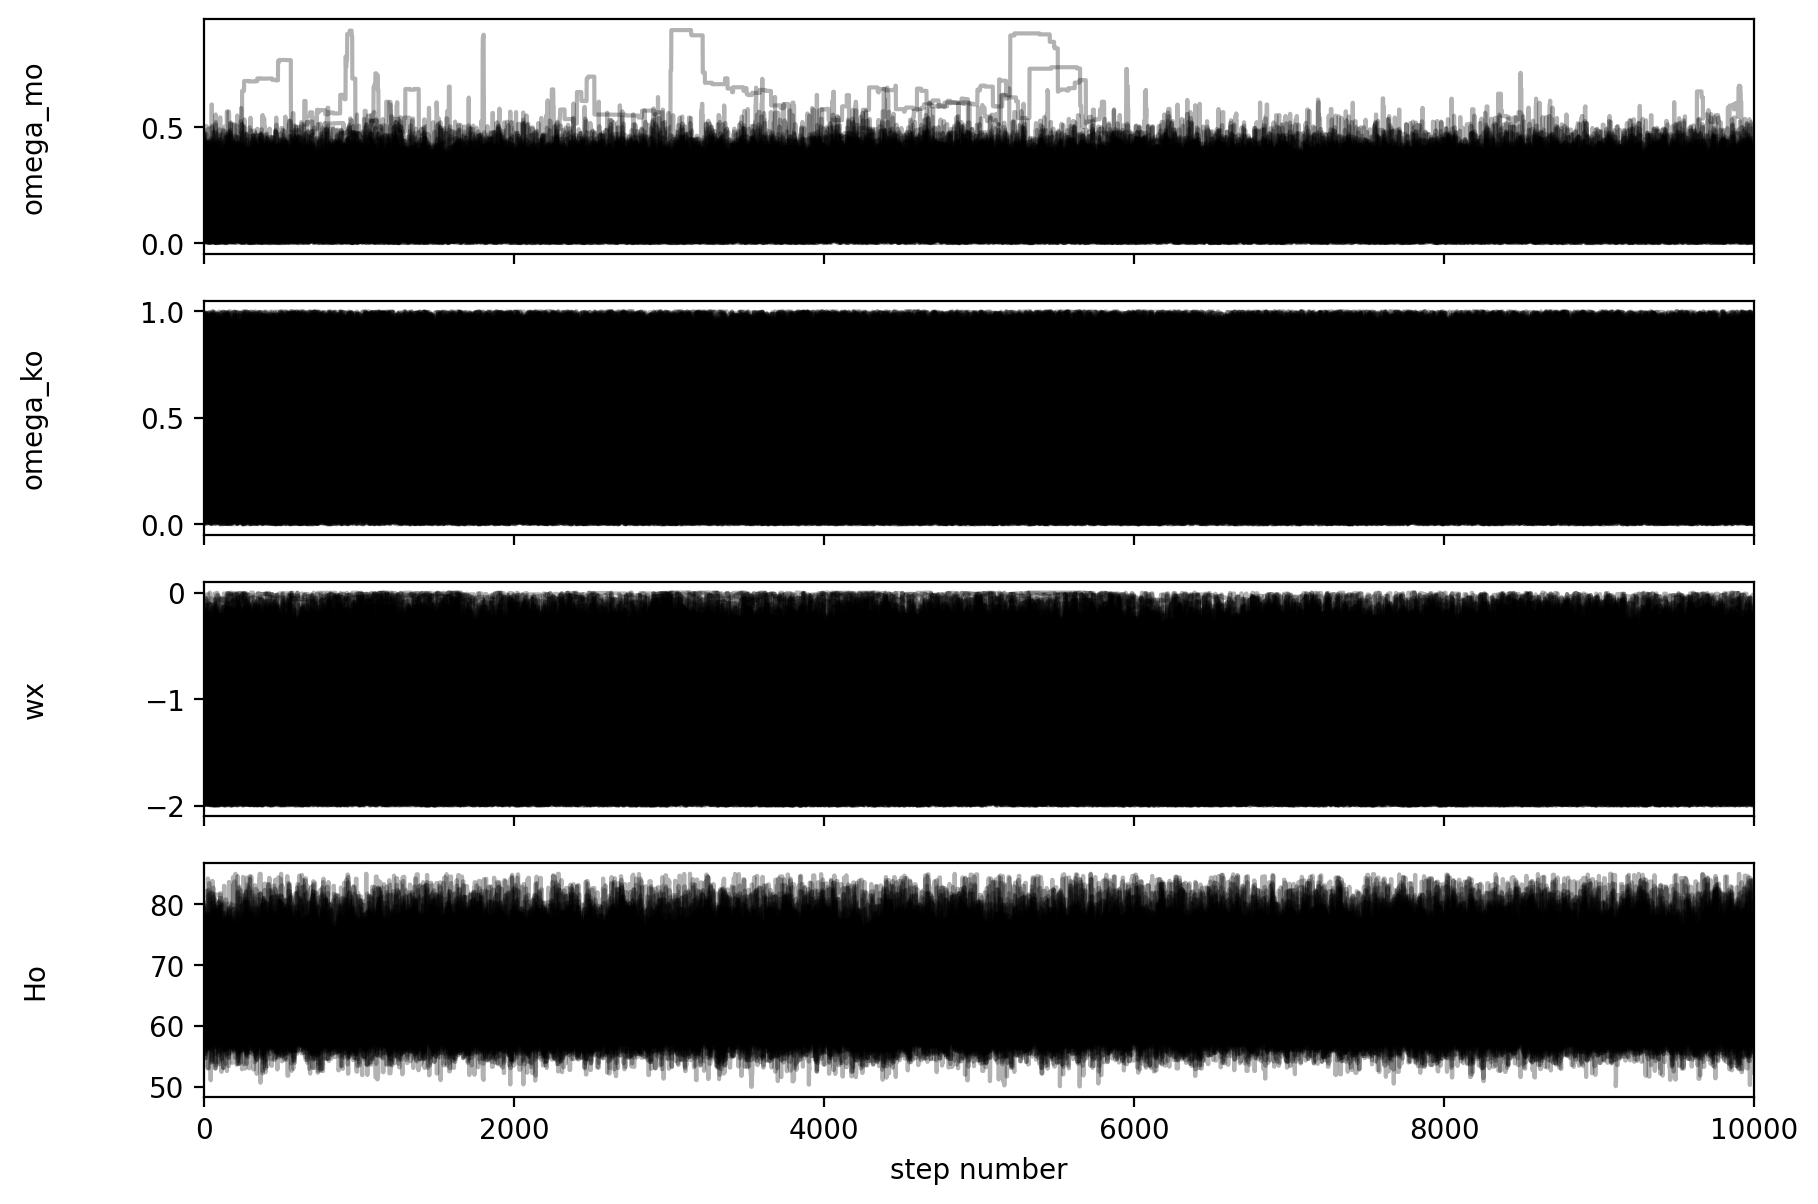

In [105]:
fig, axes = plt.subplots(4,figsize =(10,7),sharex=True)
samples = sampler.get_chain()
labels = ["omega_mo","omega_ko","wx","Ho"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:,:,i],"k",alpha= 0.3)
    ax.set_xlim(0,len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1,0.5)
    axes[-1].set_xlabel("step number");

In [107]:
tau = sampler.get_autocorr_time()
print(tau)

[ 89.53198939 105.35777011 122.31344821  87.59382346]


In [109]:
samples.shape

(10000, 200, 4)

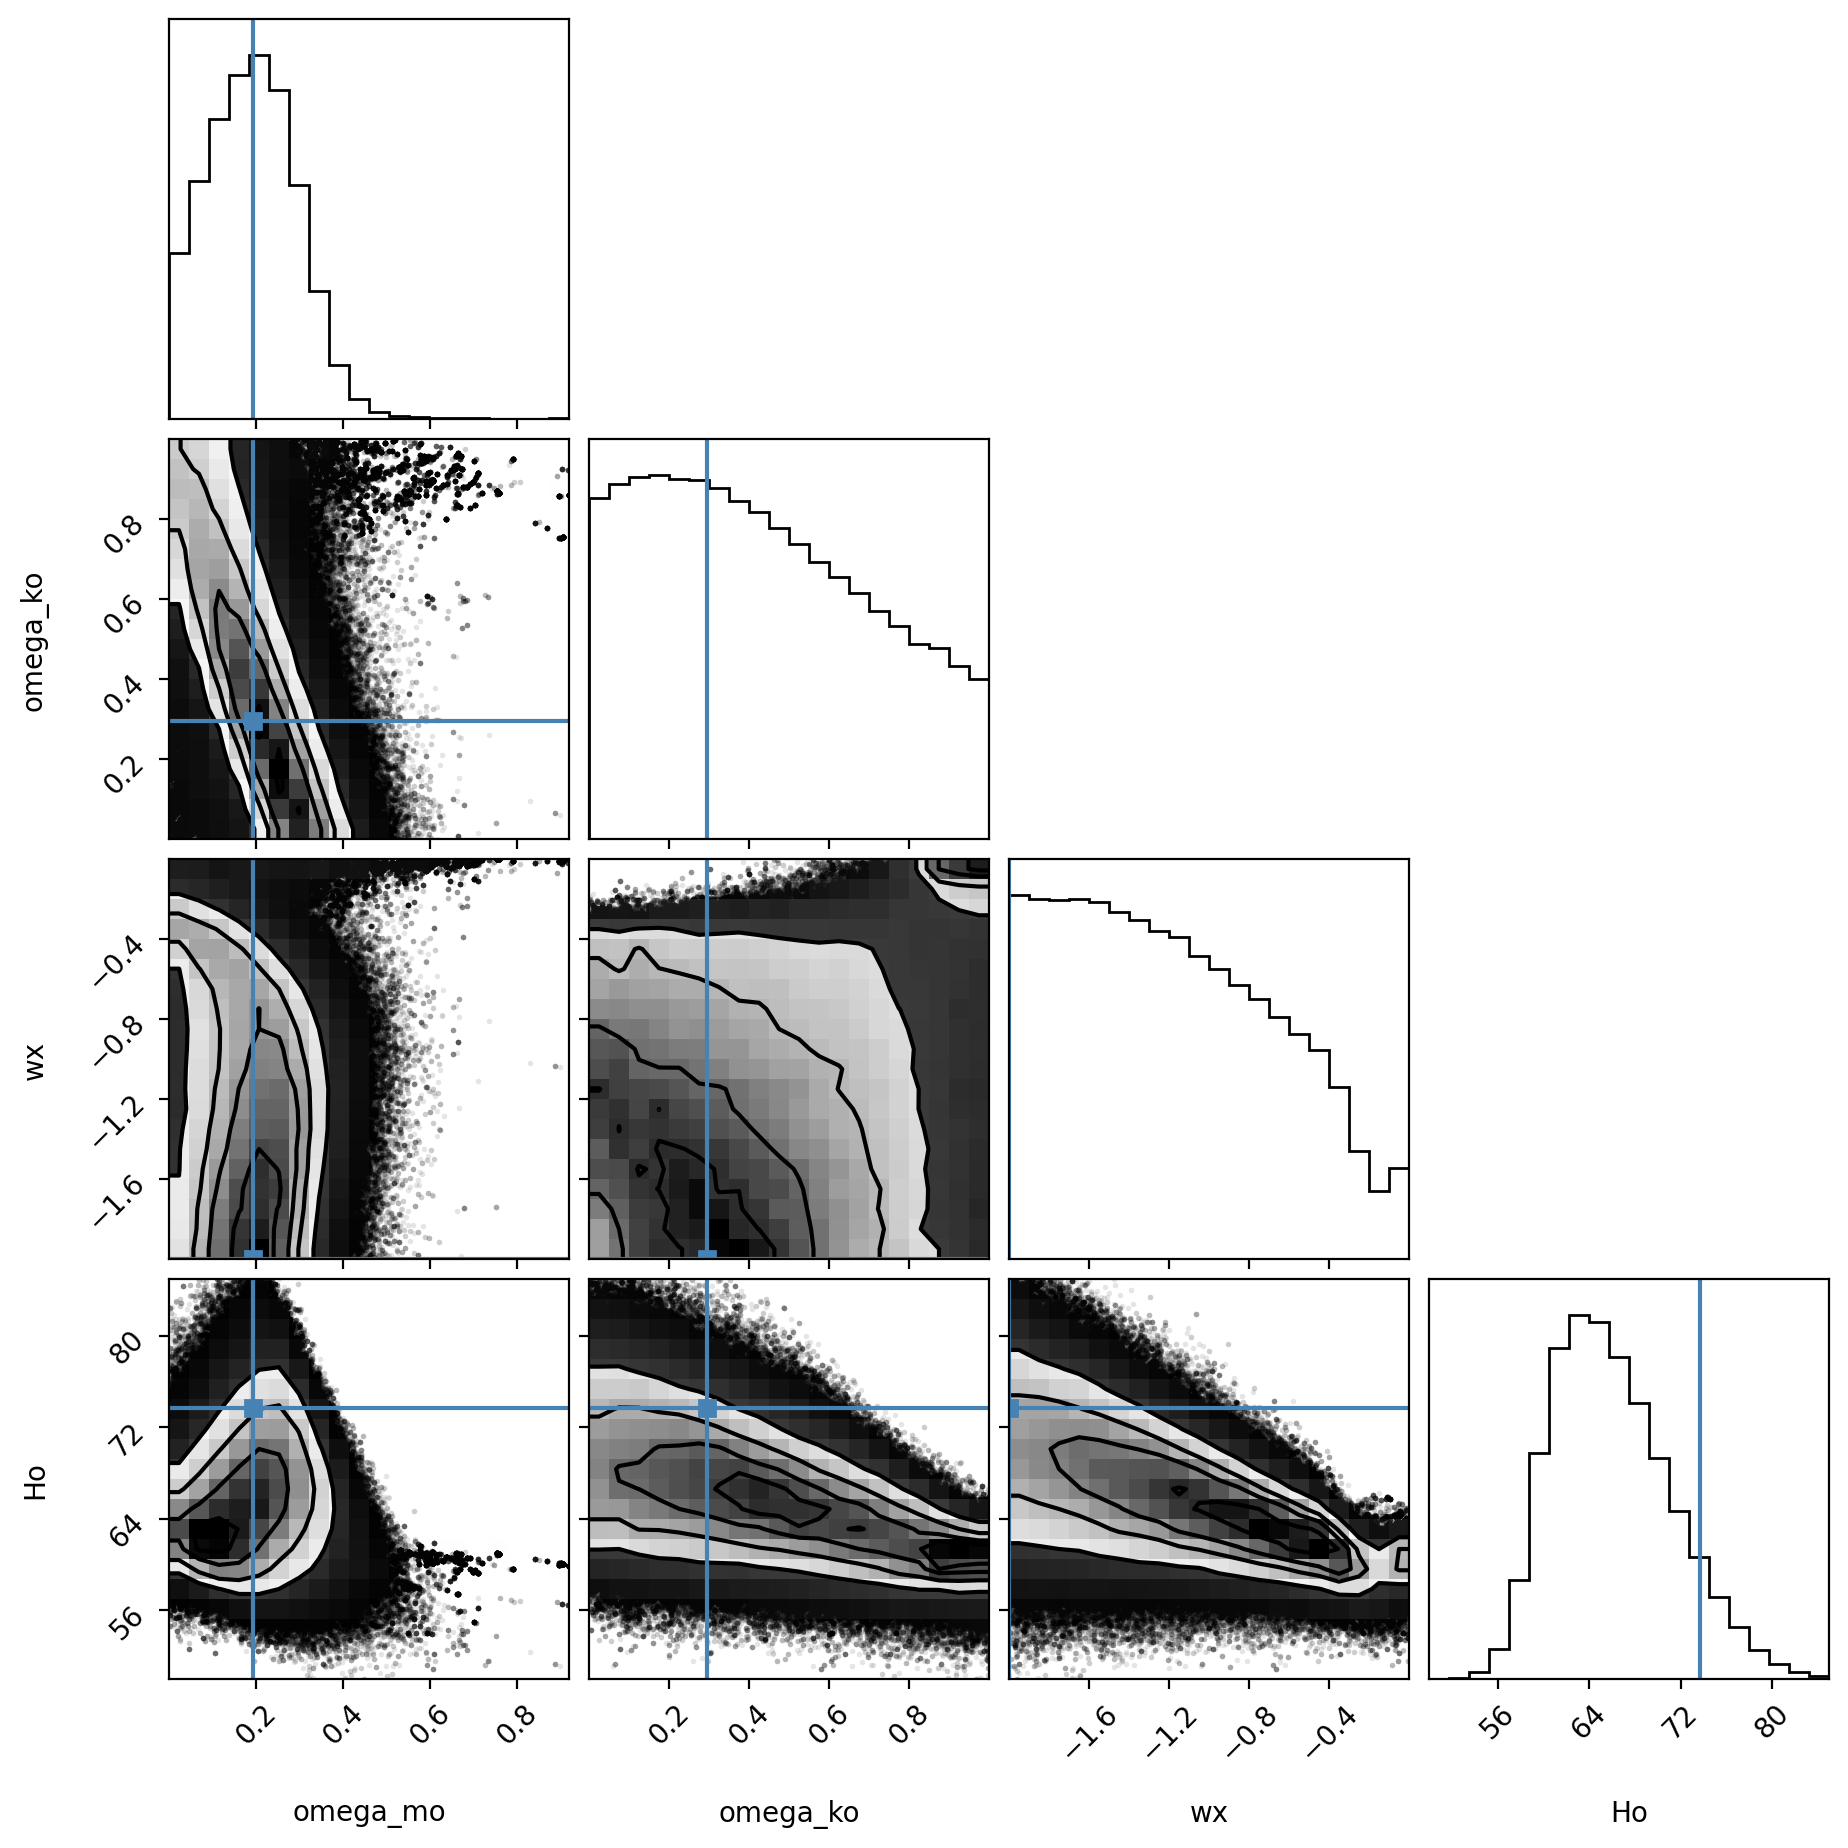

In [111]:
import corner
flat_samples = sampler.get_chain(flat =True)
fig = corner.corner(flat_samples,labels = labels ,truths = soln.x);

In [113]:
from IPython.display import display,Math
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:,i],[15.87, 50, 84.13])
    q= np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1],q[0],q[1],labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [115]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import sys,os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots,MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version :%s ,Matplotlib version:%s'%(getdist.__version__,plt.matplotlib.__version__))
      

GetDist Version :1.4.6 ,Matplotlib version:3.8.0


In [117]:
names = ["omega_mo","omega_ko","wx","Ho"]
labels = ["omega_mo","omega_ko","wx","Ho"]
samples = MCSamples(samples=flat_samples,names=names,labels=labels)

Removed no burn in


In [119]:
means = samples.getMeans()
stats = samples.getMargeStats()
conf_levels = samples.contours

In [121]:
print(means)
mcmc

[ 0.19202746  0.43258595 -1.18862169 66.05975678]


array([60.89629704, 65.44077901, 71.4446197 ])

In [123]:
lims0 = stats.parWithName('omega_mo').limits
lims1 = stats.parWithName('omega_ko').limits
lims1 = stats.parWithName('wx').limits
lims1 = stats.parWithName('Ho').limits

In [125]:
for conf,lim0,lim1 in zip(samples.contours,lims0,lims1):
    #print(lim.lower,mcmc1[1])
    if conf != 0.6827:
        continue
    print('value: %.3f,lower: %.3f,upper: %.3f'%(means[0],lim0.lower-means[0],lim1.upper-means[0]))
    print('value: %.3f,lower: %.3f,upper: %.3f'%(means[1],lim0.lower-means[1],lim1.upper-means[1]))
    print('value: %.3f,lower: %.3f,upper: %.3f'%(means[2],lim0.lower-means[2],lim1.upper-means[2]))
    print('value: %.3f,lower: %.3f,upper: %.3f'%(means[3],lim0.lower-means[3],lim1.upper-means[3]))

<Figure size 600x450 with 0 Axes>

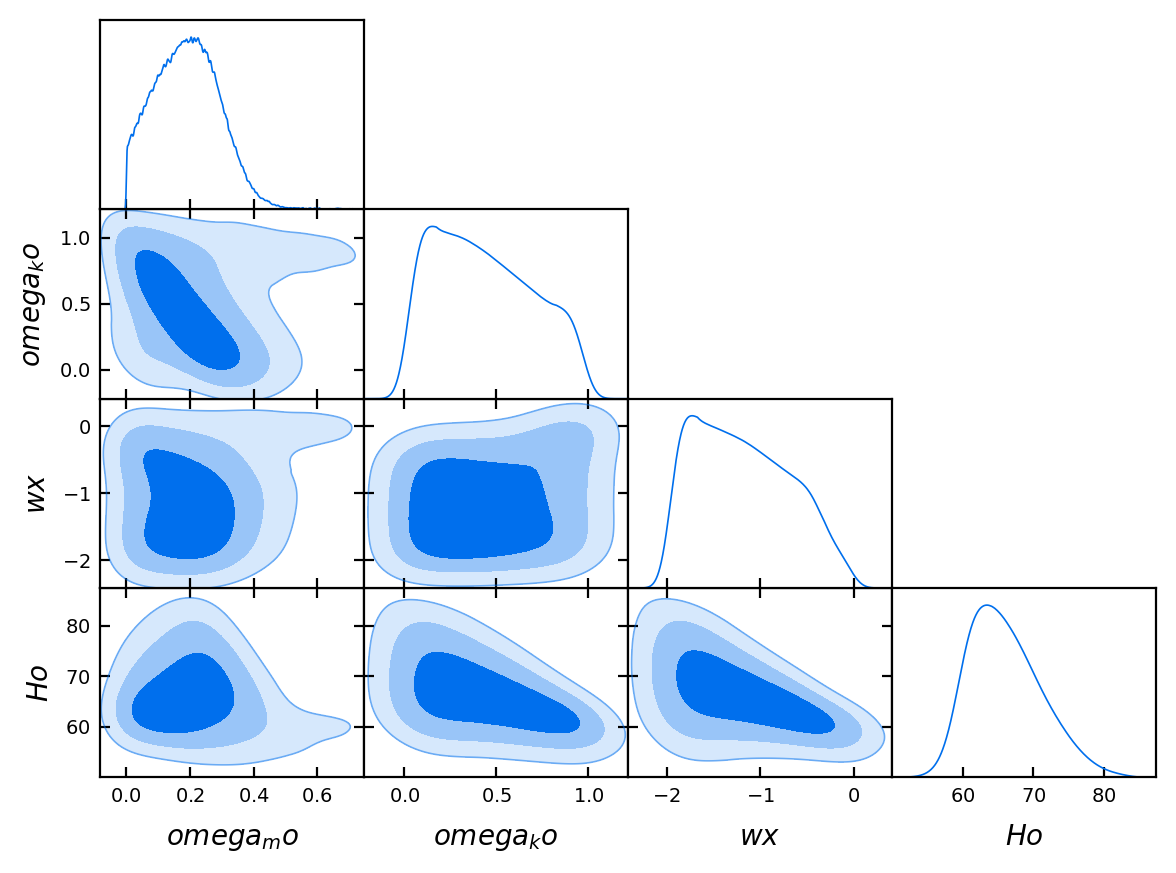

In [127]:
# g = plots.get_single_plotter()
# samples.updateSettings({'contours':[0.6827,0.9545,0.9973]})
# g.settings.num_plot_contours = 4
# g.triangle_plot([samples],filled= True);


g = plots.get_single_plotter()
samples.updateSettings({
    'contours': [0.6827, 0.9545, 0.9973], 
    'fine_bins_2D': 2000,  # Adjust this value as needed
    'smooth_scale_2D': 0.5,  # Adjust smoothing
    'fig_size':(10,10), # Increase figure size
    'dpi':500, # Increase resolution
    
})

g.settings.num_plot_contours = 3

# Set fixed bandwidth values (these values need to be chosen based on your data)

g.triangle_plot([samples], filled=True)